# Author-Vidhi Agrawal (Data Science and Business Analytics Intern)
# The Sparks Foundation
# Task-1
# Prediction Using Supervise Machine Learning(ML)

Predicting the percentage of a student based on number of study hours. 

***IMPORTING THE LIBRARIES***

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***READING DATA FORM REMOTE LINK***

In [20]:

s_data =  pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")
s_data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***CHECKING THE SIZE OF DATASET***

In [21]:
s_data.shape

(25, 2)

***SUMMARY OF DATASET***

In [22]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


***CHECKING FOR NULL VALUES***

In [23]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


    So there is no null values in our dataset.

***DATA VISUALISATION ON 2D GRAPH***

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

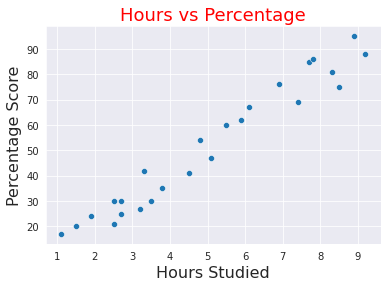

In [24]:
sns.set_style('darkgrid')
sns.scatterplot(x= s_data['Hours'], y=s_data['Scores'])  
plt.title('Hours vs Percentage',size=18,color='red')  
plt.xlabel('Hours Studied',size=16)  
plt.ylabel('Percentage Score',size=16)  
plt.show()


From the above graph we can clearly see that there is positive relation between PERCENTAGE SCORE and number of HOURS STUDIED

***DATA PREPARATION***

**Spliting data into input variables and target variables**

In [25]:
X = s_data['Hours'].values.reshape(-1,1)
y = s_data['Scores'].values.reshape(-1,1)

**Spliting the data into Training and Test set**

In [26]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print('Training set X :',X_train.shape)
print('Training set y :',y_train.shape)
print('Test set X :',X_test.shape)
print('Test set y :',y_test.shape)



Training set X : (20, 1)
Training set y : (20, 1)
Test set X : (5, 1)
Test set y : (5, 1)


***MODEL DEVELOPMENT***

Here we build a ML model or simple linear regression using sckit learn library and training the model through the given dataset to predict the score of the student based on the no. of hours they study.

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print('Coefficient: ',regressor.coef_)



Coefficient:  [[9.91065648]]


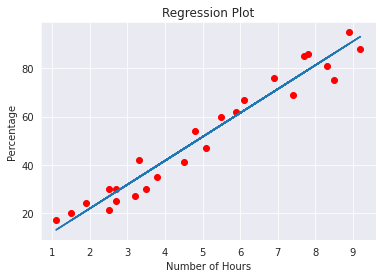

In [28]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'red')
plt.title('Regression Plot')
plt.xlabel('Number of Hours')
plt.ylabel('Percentage')
plt.plot(X, line);
plt.show()

***CORRELATION BETWEEN THE ATTRIBUTE***

In [29]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


***MAKING PREDICTIONS***

Now that we have trained our algorithm, it's time to make some predictions.

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

**Comparing Actual vs Predicted marks in the dataset**

In [31]:
s_data = pd.DataFrame({'Hours': X_test.reshape(1,-1)[0], 'Actual': y_test.reshape(1,-1)[0], 'Predicted': y_pred.reshape(1,-1)[0]}) 
s_data

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


***ACCURACY OF MODEL***

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


So the mean absolute vale of error is small so there are less possibilities of errors.

***PREDICTION USING MODEL***

**Q. What will be the predicted score if a student studies for 9.25 hrs/day?**

In [33]:
hours = 9.25
result = regressor.predict([[hours]])
print(result)

[[93.69173249]]


**RESULT- According to the model, if a student studies for 9.25 hours per day, than he/she will score 93.6917 %.**